In [2]:
import numpy as np
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('E:\Backorder\Backorder_r\dataset\InputFile.csv')
data.head(10)

,Index_Product,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,3352105,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,1,3403239,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes
5,5,3316047,0.0,4.0,0.0,10.0,10.0,10.0,0.0,0.0,...,0.0,0.57,0.68,0.0,Yes,No,No,Yes,No,Yes
6,6,3317147,0.0,8.0,0.0,2.0,3.0,4.0,0.0,1.0,...,0.0,0.56,0.68,0.0,No,No,No,Yes,No,Yes
7,7,3319588,0.0,8.0,0.0,22.0,44.0,60.0,0.0,0.0,...,0.0,0.83,0.91,0.0,No,No,No,Yes,No,Yes
8,8,3323488,0.0,2.0,0.0,16.0,16.0,16.0,9.0,21.0,...,0.0,0.97,0.96,0.0,No,No,No,Yes,No,Yes
9,9,3325147,3.0,8.0,0.0,25.0,39.0,53.0,11.0,22.0,...,0.0,0.51,0.57,0.0,No,No,No,Yes,No,Yes


In [4]:
columns = list(data.columns)

In [5]:
print(columns)

['Index_Product', 'sku', 'national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [6]:
data.shape

(9688, 24)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index_Product      9688 non-null   int64  
 1   sku                9688 non-null   int64  
 2   national_inv       9688 non-null   float64
 3   lead_time          8473 non-null   float64
 4   in_transit_qty     9688 non-null   float64
 5   forecast_3_month   9688 non-null   float64
 6   forecast_6_month   9688 non-null   float64
 7   forecast_9_month   9688 non-null   float64
 8   sales_1_month      9688 non-null   float64
 9   sales_3_month      9688 non-null   float64
 10  sales_6_month      9688 non-null   float64
 11  sales_9_month      9688 non-null   float64
 12  min_bank           9688 non-null   float64
 13  potential_issue    9688 non-null   object 
 14  pieces_past_due    9688 non-null   float64
 15  perf_6_month_avg   9688 non-null   float64
 16  perf_12_month_avg  9688 

In [8]:
data.isna().sum()

Index_Product           0
sku                     0
national_inv            0
lead_time            1215
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [9]:
data.went_on_backorder.value_counts()

No     7000
Yes    2688
Name: went_on_backorder, dtype: int64

In [10]:
%matplotlib inline
sns.set(style = 'darkgrid')

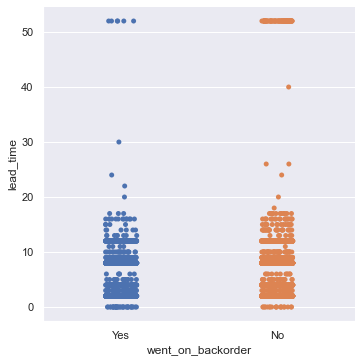

In [11]:
sns.catplot(x = 'went_on_backorder',
        y = 'lead_time', data = data)

In [12]:
# lets do a simple drop not so suspecious
data.dropna(inplace=True)
data.shape

(8473, 24)

<AxesSubplot:>

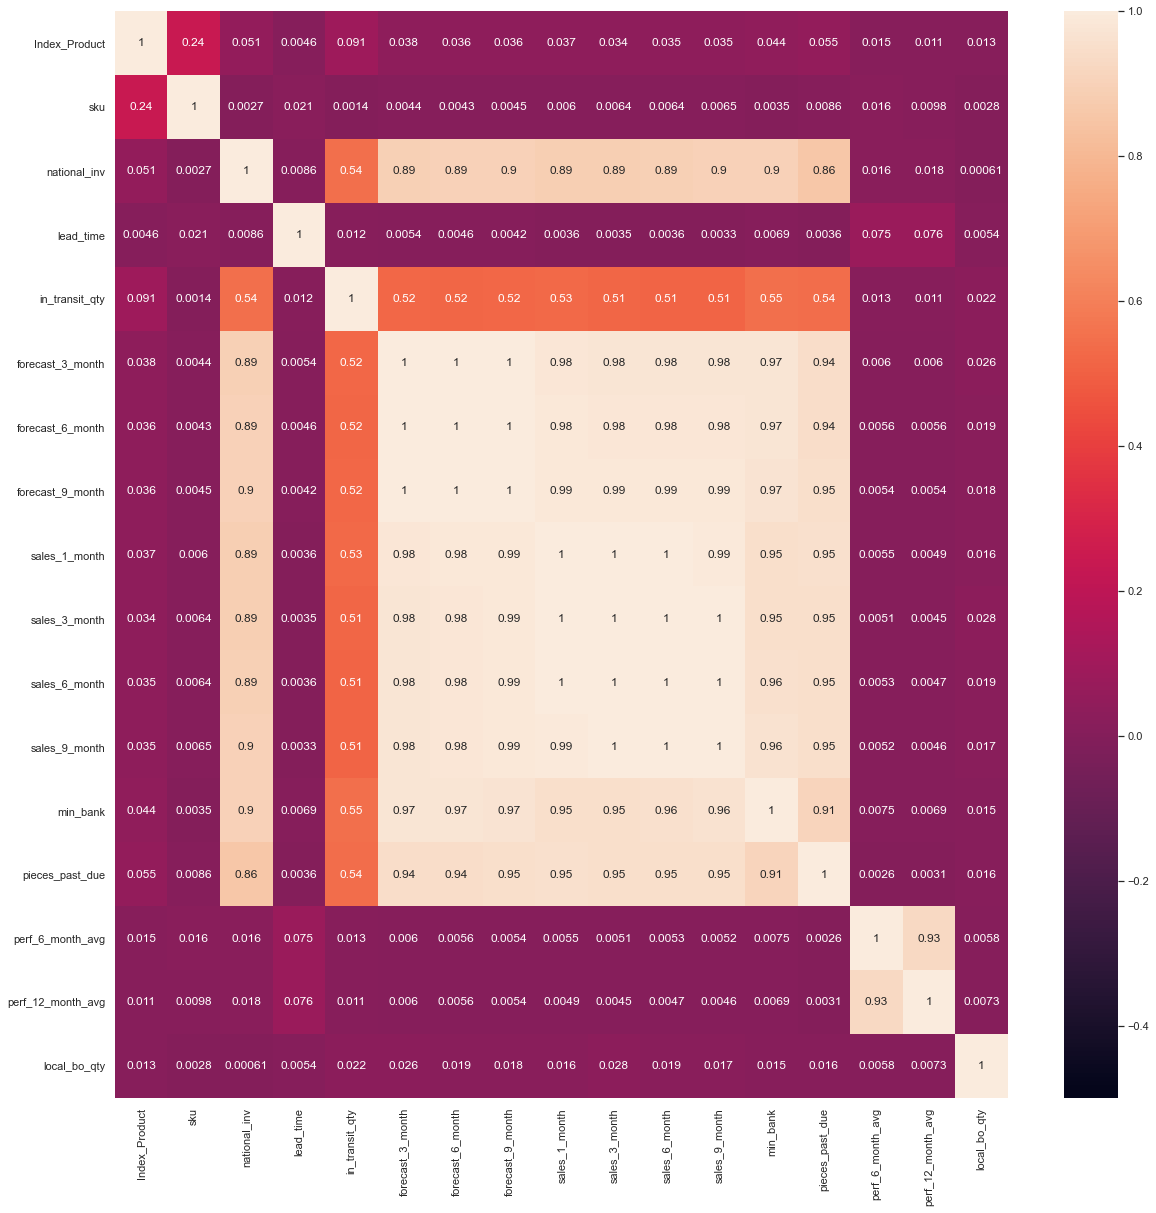

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [14]:
categorical_col = ["potential_issue","deck_risk","oe_constraint","ppap_risk","stop_auto_buy","rev_stop","went_on_backorder"]

In [15]:
for col in categorical_col:
    data[col] = data[col].map({"Yes" : 0, "No" : 1})

In [16]:
from sklearn.model_selection import train_test_split
df = data.copy()
X = df.drop(["went_on_backorder","sku"],axis=1) #sku order number types
y = df["went_on_backorder"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
print(classification_report(y_test ,pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       812
           1       1.00      1.00      1.00      1730

    accuracy                           1.00      2542
   macro avg       1.00      1.00      1.00      2542
weighted avg       1.00      1.00      1.00      2542



In [18]:
from sklearn.preprocessing import StandardScaler
Scalarm = StandardScaler()
X_scaled = pd.DataFrame(Scalarm.fit_transform(X),columns=X.columns)

In [21]:
X_scaled_train, X_scaled_test, y_train_, y_test_ = train_test_split(X_scaled, y, test_size=0.3)
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_scaled_train, y_train_)
pred_rf2 = rf_model2.predict(X_scaled_test)
print(classification_report(y_test_, pred_rf2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00      1761

    accuracy                           1.00      2542
   macro avg       1.00      1.00      1.00      2542
weighted avg       1.00      1.00      1.00      2542



In [27]:
backorder_val = list(data['went_on_backorder'].value_counts())

In [32]:
print(f"ratio of two classes : {backorder_val[1]/backorder_val[0]}")

ratio of two classes : 0.4436871698756176
